Дипломная работа: "Анализ розничных продаж (поиск инсайтов, составление рекомендаций стейкхолдерам)"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def show_diagram(df):
  sns.set()
  sns.set_style("whitegrid")
  sns.set_context("poster", font_scale = 1)
  f, ax = plt.subplots(figsize=(15,5))
  df.plot(ax=ax).legend(bbox_to_anchor= (1.03, 1) )
  plt.show()
  return

In [ ]:
raw_set = pd.read_csv('https://raw.githubusercontent.com/sleepyHeretic/Netology-Diploma/main/customer_shopping_data.csv')


In [ ]:
raw_set.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
raw_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
raw_set.describe(include = 'all')
# пропусков нет, customer_id только уникальные значения...почему так?

/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:74: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(df[column], errors='coerce')


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I138884,C241288,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [ ]:
raw_set.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

Описание полей дата-сета:

> 'invoice_no' - номер чека;

> 'customer_id' - id покупателя;

> 'gender' - пол покупателя;

> 'age' - возраст покупателя;

> 'category' - категория товаров;

> 'quantity' - количество товаров в чеке;

> 'price' - цена единицы товара;

> 'payment_method' - вид оплаты (кредитка, наличные, дебетовая карта);

> 'invoice_date' - дата покупки;

> 'shopping_mall' - название Торгового центра.

In [ ]:
raw_set.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Дополнение и преобразование дата-сета для дальнейшей работы:

1. Преобразуем столбец 'invoice_date' к типу date time

In [ ]:
raw_set['invoice_date'] = pd.to_datetime(raw_set['invoice_date'])
raw_set.head()

<ipython-input-6-0afd6c677073>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  raw_set['invoice_date'] = pd.to_datetime(raw_set['invoice_date'])


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


2. Добавляем столбец с суммой чека - 'sum_of_purchase'

In [ ]:
raw_set['sum_of_purchase'] = raw_set['quantity']*raw_set['price']
raw_set.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


3. Выделяем из даты 'invoice_date' месяц и год в столбец 'year-month'

In [ ]:
raw_set['year-month'] = raw_set['invoice_date'].dt.to_period('M')
raw_set.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10


4. Выделяем из даты 'invoice_date' только год в столбец 'year'

In [ ]:
raw_set['year'] = raw_set['invoice_date'].dt.year
raw_set.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,2021


Определим размер выручки отдельно по годам

In [ ]:
raw_set.groupby('year').agg({'sum_of_purchase': 'sum'})

,sum_of_purchase
year,
2021,1.145606e+08
2022,1.154368e+08
2023,2.150841e+07


Видим резкое снижение выручки за 2023 год

Определим количество покупок, объем продаж и средний чек за каждый год:

In [ ]:
raw_set.groupby('year').agg({'invoice_no':'count','quantity':'sum','sum_of_purchase': 'mean'})

,invoice_no,quantity,sum_of_purchase
year,,,
2021,45382,136096,2524.361434
2022,45551,137147,2534.232269
2023,8524,25469,2523.276581


Все показатели кроме среднего чека значительно снизились

Причины снижения потока посетителей в 2023 году:
1. Снижение количества туристов.
2. Проблемы с поставками товаров.
3. Магазины были закрыты по техническим и т.д. причинам.
4. Технический сбой

Проверим гипотезу о снижении тур-потока, используя категорию товаров 'Souvenir'

In [ ]:
df_tourists = raw_set[raw_set['category'] == 'Souvenir']
df_tourists.groupby('year').agg({'category':'count'})

,category
year,
2021,2270
2022,2301
2023,428


Видим значительное снижение продаж сувенирной продукции.

Проверяем предположение о закрытии отдельных магазинов. Из дата-фрейма ниже видим, что, продажи в январе и феврале были каждый день, а начиная с марта и по декабрь только в 1-3 число месяца.
Поскольку в датасете представлены крупные ТЦ Стамбула, предположение что они могут работать 1-3 дня в месяц не реалистично, следовательно данные за остальные дни месяца по какой-то причине не сохранялись.


In [ ]:
df_2023.groupby('invoice_date')['shopping_mall'].nunique().to_frame()

,shopping_mall
invoice_date,
2023-01-01,10
2023-01-02,10
2023-01-03,10
2023-01-13,10
2023-01-14,10
...,...
2023-10-02,10
2023-11-01,10
2023-11-02,10


Разделим данные по годам:

2021 год

In [ ]:
df_2021 = raw_set.loc[raw_set['year'] == 2021]
df_2021

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,300.08,2021-09,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,2021
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1200.32,2021-01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99448,I332105,C231387,Female,65,Shoes,4,2400.68,Credit Card,2021-08-29,Metropol AVM,9602.72,2021-08,2021
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,2021-09-10,Metropol AVM,896.00,2021-09,2021
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021-09,2021
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021-03,2021


2022 год

In [ ]:
df_2022 = raw_set[raw_set['year'] == 2022]
df_2022

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,2022
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,2022-05,2022
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,2022-03,2022
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,20.92,2022-12,2022
11,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall,15.15,2022-10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99434,I186560,C117024,Female,39,Shoes,1,600.17,Cash,2022-03-21,Kanyon,600.17,2022-03,2022
99435,I141871,C298790,Female,62,Clothing,3,900.24,Cash,2022-02-02,Emaar Square Mall,2700.72,2022-02,2022
99436,I579905,C265057,Female,57,Clothing,5,1500.40,Cash,2022-03-27,Cevahir AVM,7502.00,2022-03,2022
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022-09,2022


2023 год

In [ ]:
df_2023 = raw_set.loc[raw_set.year == 2023]
df_2023

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
19,I992454,C196845,Male,24,Toys,4,143.36,Cash,2023-07-03,Cevahir AVM,573.44,2023-07,2023
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall,300.08,2023-02,2023
35,I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,2023-04-01,Emaar Square Mall,5.23,2023-04,2023
46,I267193,C317818,Female,19,Cosmetics,3,121.98,Credit Card,2023-12-01,Mall of Istanbul,365.94,2023-12,2023
51,I202367,C317478,Female,41,Books,3,45.45,Cash,2023-02-24,Istinye Park,136.35,2023-02,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99429,I208840,C219131,Female,58,Toys,1,35.84,Credit Card,2023-02-18,Istinye Park,35.84,2023-02,2023
99441,I203187,C235554,Male,38,Food & Beverage,4,20.92,Cash,2023-02-03,Zorlu Center,83.68,2023-02,2023
99446,I327966,C107209,Female,32,Food & Beverage,1,5.23,Cash,2023-05-02,Metropol AVM,5.23,2023-05,2023
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,2023-01-01,Kanyon,300.08,2023-01,2023


Я приняла решение оставить данные за полные месяцы - январь и феврель, а оставшиеся данные считать данными за март, я считаю что это меньше исказит статистику и возможное прогнозирование

In [ ]:
df_2023_corrected = df_2023.copy()
df_2023_corrected.loc[(df_2023_corrected['year-month']>'2023-02'),'year-month'] = '2023-03'
df_2023_corrected

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
19,I992454,C196845,Male,24,Toys,4,143.36,Cash,2023-07-03,Cevahir AVM,573.44,2023-03,2023
20,I183746,C220180,Male,23,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall,300.08,2023-02,2023
35,I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,2023-04-01,Emaar Square Mall,5.23,2023-03,2023
46,I267193,C317818,Female,19,Cosmetics,3,121.98,Credit Card,2023-12-01,Mall of Istanbul,365.94,2023-03,2023
51,I202367,C317478,Female,41,Books,3,45.45,Cash,2023-02-24,Istinye Park,136.35,2023-02,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99429,I208840,C219131,Female,58,Toys,1,35.84,Credit Card,2023-02-18,Istinye Park,35.84,2023-02,2023
99441,I203187,C235554,Male,38,Food & Beverage,4,20.92,Cash,2023-02-03,Zorlu Center,83.68,2023-02,2023
99446,I327966,C107209,Female,32,Food & Beverage,1,5.23,Cash,2023-05-02,Metropol AVM,5.23,2023-03,2023
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,2023-01-01,Kanyon,300.08,2023-01,2023


Распределение категорий товаров по объемам продаж и выручке

In [ ]:
raw_set.groupby('category').agg({'quantity':'sum','sum_of_purchase':'sum'}).sort_values('sum_of_purchase',ascending = False)

,quantity,sum_of_purchase
category,,
Clothing,103558,1.139968e+08
Shoes,30217,6.655345e+07
Technology,15021,5.786235e+07
Cosmetics,45465,6.792863e+06
Toys,30321,3.980426e+06
Food & Beverage,44277,8.495351e+05
Books,14982,8.345529e+05
Souvenir,14871,6.358247e+05


<Axes: title={'center': 'Объем продаж по категориям'}, xlabel='category'>

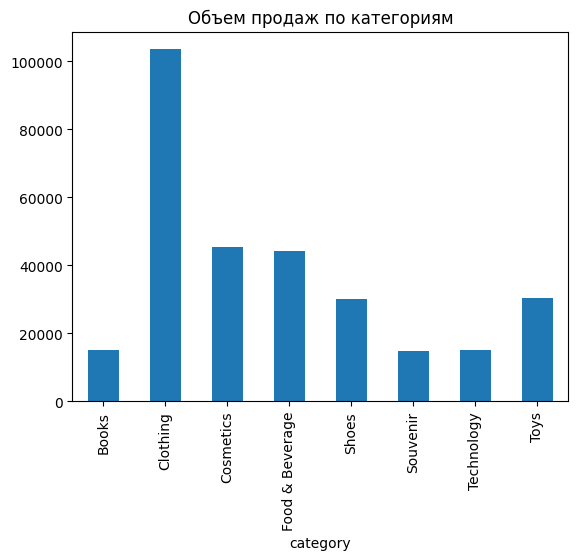

In [ ]:
raw_set.groupby('category').agg({'quantity':'sum'}).plot(kind = 'bar',title = 'Объем продаж по категориям', legend = False)


По объему продаж лидирует одежда, затем косметика, продовольственные товары и игрушки

<Axes: title={'center': 'Выручка по категориям'}, xlabel='category'>

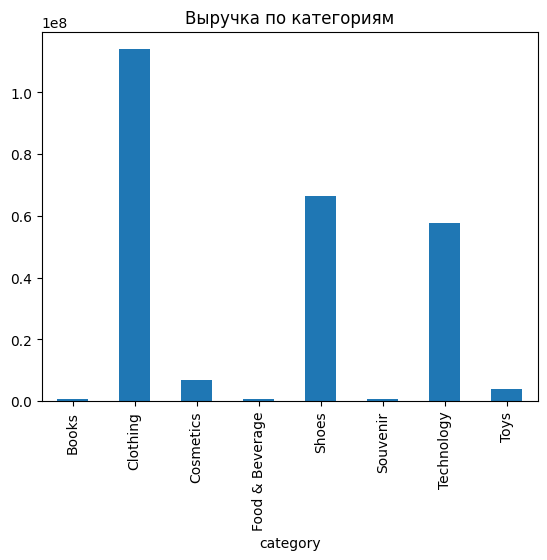

In [ ]:
raw_set.groupby('category').agg({'sum_of_purchase':'sum'}).plot(kind = 'bar',title = 'Выручка по категориям', legend = False)

По выручке лидируют одежда, обувь и техника

Посмотрим объем продаж и выручку по категориям товаров и по годам

In [ ]:
df_raw = pd.pivot_table(raw_set, index='category', columns='year', values=['quantity', 'sum_of_purchase'],aggfunc='sum')
df_raw

quantity              sum_of_purchase                         
year                2021   2022  2023            2021         2022        2023
category                                                                      
Books               6605   7051  1326       369008.55    391945.65    73598.70
Clothing           47871  46889  8798     52604924.24  51753897.36  9637969.44
Cosmetics          20366  21038  4061      3033723.92   3150499.44   608639.54
Food & Beverage    20302  20244  3731       390848.36    386852.64    71834.05
Shoes              13733  13960  2524     30125533.15  30944765.20  5483153.12
Souvenir            6745   6901  1225       288288.21    295865.79    51670.65
Technology          6766   6922  1333     25951800.00  26651100.00  5259450.00
Toys               13708  14142  2471      1796444.16   1861888.00   322094.08

Разделим покупателей по показателям пол/возраст и пронаблюдаем какие покупатели принесли больше прибыли:

Женщины:

In [ ]:
df_female = raw_set.loc[raw_set.gender == 'Female']
df_female

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sum_of_purchase,year-month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,2022-05,2022
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,2021
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,2022-05,2022
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,2022-03,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99447,I281214,C288090,Female,37,Toys,3,107.52,Cash,2021-02-21,Metropol AVM,322.56,2021-02,2021
99448,I332105,C231387,Female,65,Shoes,4,2400.68,Credit Card,2021-08-29,Metropol AVM,9602.72,2021-08,2021
99450,I170504,C226974,Female,28,Books,1,15.15,Cash,2023-02-28,Zorlu Center,15.15,2023-02,2023
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022-09,2022


In [ ]:
df_female_revenue = df_female.groupby(['age']).agg({'sum_of_purchase':'sum','customer_id':'count'}).sort_values('sum_of_purchase', ascending=False)

<Axes: xlabel='age', ylabel='sum_of_purchase'>

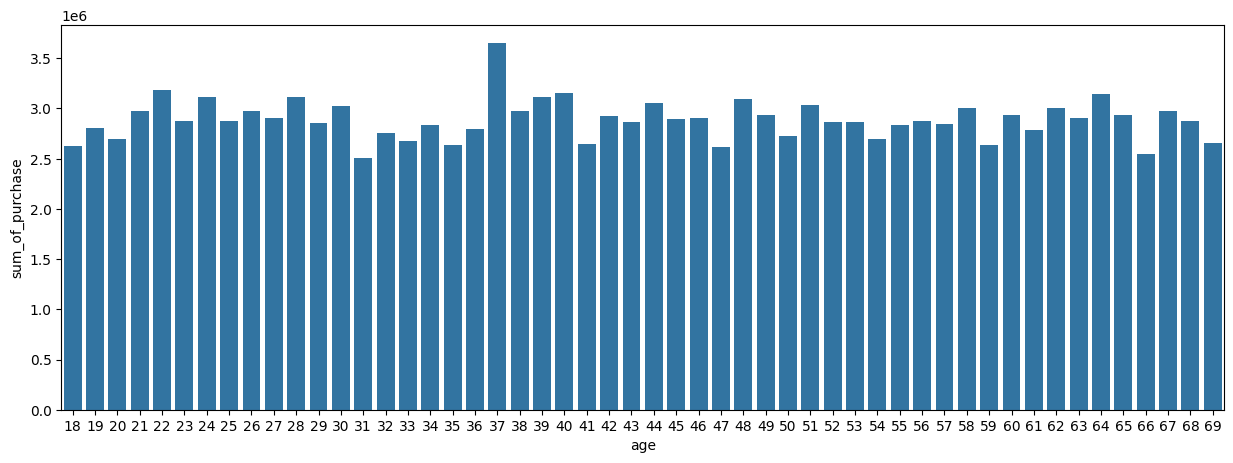

In [ ]:

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(df_female_revenue, x = 'age', y = 'sum_of_purchase', ax=ax)

Больше на покупки потратили женщины 22-30 лет, 37-40 лет, 48,64 лет. По категориям товаров лидеры не поменялись

Мужчины

In [ ]:
df_male = raw_set.loc[raw_set.gender == 'Male']
df_male_revenue = df_male.groupby(['age']).agg({'sum_of_purchase':'sum','customer_id':'count'}).sort_values('sum_of_purchase', ascending=False)

<Axes: xlabel='age', ylabel='sum_of_purchase'>

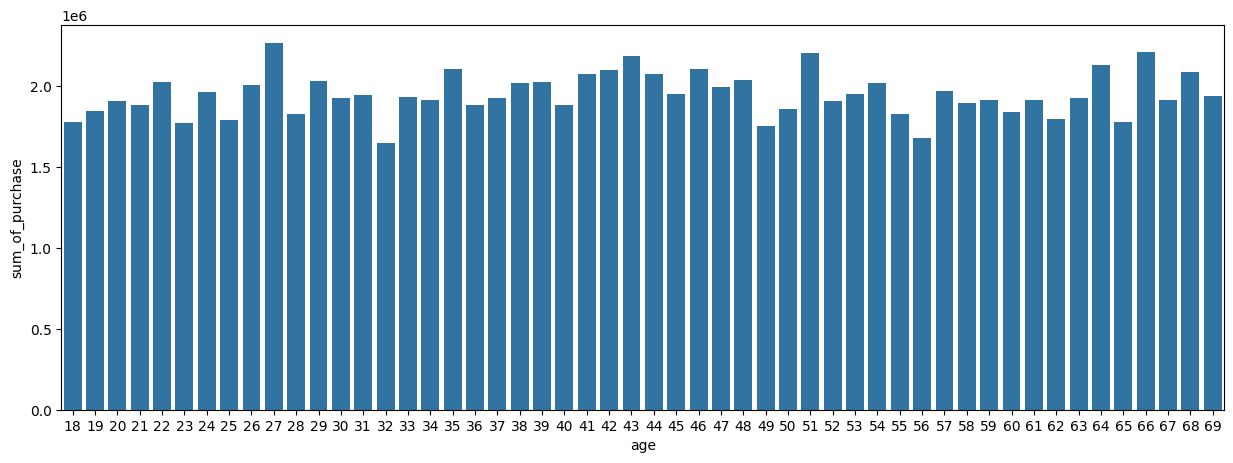

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(df_male_revenue, x = 'age', y = 'sum_of_purchase', ax=ax)

Больше на покупки потратили мужчины 27 лет, 33-54 лет. По категориям товаров лидеры не поменялись

In [ ]:
df_male.groupby('category').agg({'quantity':'sum','sum_of_purchase':'sum'}).sort_values('sum_of_purchase', ascending= False)

,quantity,sum_of_purchase
category,,
Clothing,41519,45745095.44
Shoes,12311,27128284.17
Technology,6044,23192400.00
Cosmetics,18204,2726090.36
Toys,11959,1564380.16
Books,6206,345238.20
Food & Beverage,17915,344212.45
Souvenir,5895,252957.45


In [ ]:
df_female.groupby('category').agg({'quantity':'sum','sum_of_purchase':'sum'}).sort_values('sum_of_purchase', ascending= False)

,quantity,sum_of_purchase
category,,
Clothing,62039,68251695.60
Shoes,17906,39425167.30
Technology,8977,34669950.00
Cosmetics,27261,4066772.54
Toys,18362,2416046.08
Food & Beverage,26362,505322.60
Books,8776,489314.70
Souvenir,8976,382867.20


Предварительный вывод по покупателям: больше прибыли заказчику приносят женщины среднего возраста. меньшую - молодые мужчины.

Распределение выручки по годам среди мужчин и женщин

In [ ]:
df_gender_all = pd.pivot_table(raw_set, values = 'sum_of_purchase', index='gender', columns='year', aggfunc='sum').reset_index()
df_gender_all

year,gender,2021,2022,2023
0,Female,68394414.66,69059876.23,12752845.13
1,Male,46166155.93,46376937.85,8755564.45


Объемы продаж среди мужчин и женщин

In [ ]:
df_gender_person = pd.pivot_table(raw_set, values = 'customer_id', index='gender', columns='year', aggfunc='count').reset_index()
df_gender_person

year,gender,2021,2022,2023
0,Female,27156,27192,5134
1,Male,18226,18359,3390


Общее распределение покупателей по возрастам.

In [ ]:
df_age_all = pd.pivot_table(raw_set, values = 'customer_id', index='age', columns='year', aggfunc='count').reset_index()
df_age_all

In [ ]:
# Посещаемость и выручка:
df_2021.groupby('year-month').agg({'customer_id':'count','sum_of_purchase':'sum'})

,customer_id,sum_of_purchase
year-month,,
2021-01,3771,9311287.10
2021-02,3402,8814790.84
2021-03,3918,10059349.81
2021-04,3770,9730141.58
2021-05,3864,9767474.25
2021-06,3761,9485372.57
2021-07,4014,10142596.01
2021-08,3750,9490554.67
2021-09,3619,8913202.33


In [ ]:
#Динамика выручки по месяцам:
df_seles2021 = pd.pivot_table(df_2021, values = 'sum_of_purchase', index='category', columns='year-month', aggfunc='sum')

In [ ]:
df_seles2021

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
category,,,,,,,,,,,,
Books,31784.70,27224.55,31209.00,32011.95,32617.95,30390.90,29694.00,30375.75,30042.45,34042.05,28678.95,30936.30
Clothing,4263536.64,3896538.80,4430681.20,4641937.52,4467891.12,4325353.12,4714256.80,4277040.24,4207721.76,4439683.60,4417477.68,4522805.76
Cosmetics,250790.88,234242.26,269250.52,235868.66,252945.86,268965.90,265957.06,251563.42,231599.36,266607.62,254531.60,251400.78
Food & Beverage,33173.89,28670.86,31479.37,32274.33,32305.71,34293.11,33016.99,35752.28,30365.38,31850.70,33247.11,34418.63
Shoes,2630545.11,2581931.34,2755980.64,2265641.75,2958237.93,2273443.96,2664154.63,2561525.56,2123401.46,2607738.65,2296850.59,2406081.53
Souvenir,23694.60,21618.39,23882.28,26521.53,27495.12,25031.82,25911.57,24468.78,19894.08,22322.19,20902.86,26544.99
Technology,1932000.00,1892100.00,2359350.00,2361450.00,1840650.00,2368800.00,2257500.00,2169300.00,2111550.00,2609250.00,1866900.00,2182950.00
Toys,145761.28,132464.64,157516.80,134435.84,155330.56,159093.76,152104.96,140528.64,158627.84,148305.92,142105.60,170168.32


In [ ]:
df_seles2022 = pd.pivot_table(df_2022, values = 'sum_of_purchase', index='category', columns='year-month', aggfunc='sum')
df_seles2022

year-month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
category,,,,,,,,,,,,
Books,30103.05,28891.05,35193.45,30103.05,30224.25,33890.55,35557.05,31284.75,34451.10,30224.25,32102.85,39920.25
Clothing,4387169.60,3865030.40,4317250.96,4203820.72,4339156.80,4242831.12,4585222.40,4197218.96,4359862.32,4500599.84,4277940.48,4477793.76
Cosmetics,260345.98,218628.82,269291.18,259126.18,274861.60,247660.06,249327.12,282830.96,270998.90,295679.52,261850.40,259898.72
Food & Beverage,30271.24,26845.59,34925.94,33273.26,34596.45,34083.91,33581.83,30846.54,31955.30,31118.50,31552.59,33801.49
Shoes,2461297.17,2416284.42,2942033.34,2548921.99,2712768.40,2701365.17,2457696.15,2483503.46,2633545.96,2560925.39,2376673.20,2649750.55
Souvenir,27530.31,26286.93,25360.26,23635.95,21289.95,23729.79,26357.31,28245.84,25008.36,23002.53,23682.87,21735.69
Technology,2566200.00,1881600.00,2086350.00,2373000.00,2343600.00,2300550.00,2126250.00,2191350.00,2091600.00,2453850.00,1969800.00,2266950.00
Toys,154685.44,130600.96,152320.00,144936.96,145689.60,143109.12,148198.40,163072.00,156011.52,177515.52,180669.44,165079.04


In [ ]:
df_seles2023 = pd.pivot_table(df_2022, values = 'sum_of_purchase', index='category', columns='year-month', aggfunc='sum')
df_seles2023

year-month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
category,,,,,,,,,,,,
Books,30103.05,28891.05,35193.45,30103.05,30224.25,33890.55,35557.05,31284.75,34451.10,30224.25,32102.85,39920.25
Clothing,4387169.60,3865030.40,4317250.96,4203820.72,4339156.80,4242831.12,4585222.40,4197218.96,4359862.32,4500599.84,4277940.48,4477793.76
Cosmetics,260345.98,218628.82,269291.18,259126.18,274861.60,247660.06,249327.12,282830.96,270998.90,295679.52,261850.40,259898.72
Food & Beverage,30271.24,26845.59,34925.94,33273.26,34596.45,34083.91,33581.83,30846.54,31955.30,31118.50,31552.59,33801.49
Shoes,2461297.17,2416284.42,2942033.34,2548921.99,2712768.40,2701365.17,2457696.15,2483503.46,2633545.96,2560925.39,2376673.20,2649750.55
Souvenir,27530.31,26286.93,25360.26,23635.95,21289.95,23729.79,26357.31,28245.84,25008.36,23002.53,23682.87,21735.69
Technology,2566200.00,1881600.00,2086350.00,2373000.00,2343600.00,2300550.00,2126250.00,2191350.00,2091600.00,2453850.00,1969800.00,2266950.00
Toys,154685.44,130600.96,152320.00,144936.96,145689.60,143109.12,148198.40,163072.00,156011.52,177515.52,180669.44,165079.04


In [ ]:
# динамика цен в течение года по категориям

In [ ]:
df_price2021 =  pd.pivot_table(df_2021, values = 'price', index='category', columns='year-month', aggfunc='mean')

In [ ]:
df_price2021

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
category,,,,,,,,,,,,
Books,45.134375,46.021698,45.134375,47.124033,46.760270,45.873184,43.440306,43.966237,48.461180,46.131750,45.009593,46.655114
Clothing,889.092221,897.466151,873.519095,913.770880,910.347485,913.795016,899.613528,914.064178,889.605424,894.247278,893.605954,904.904456
Cosmetics,125.061442,125.758505,122.458353,118.677292,122.923893,121.310148,121.035987,122.124440,120.897795,123.919489,123.207744,119.060821
Food & Beverage,15.754003,15.658683,15.845829,15.578920,15.478222,16.122764,15.528525,16.329122,15.573346,15.423445,15.546957,15.987569
Shoes,1797.531489,1837.320427,1841.698137,1740.325822,1815.379077,1809.258834,1845.600492,1806.697320,1679.805419,1828.716423,1797.070630,1717.571935
Souvenir,35.063871,34.385657,34.514450,34.634076,36.597600,35.938723,35.604697,34.535025,35.420000,33.101937,32.896425,35.423433
Technology,2978.804348,3252.941176,3242.010309,3229.545455,2970.000000,3292.187500,3155.329949,3048.730964,3138.888889,3310.765550,3024.000000,3101.288660
Toys,106.274225,103.875254,110.026943,111.465688,108.063030,107.968000,104.230338,104.815094,108.425051,105.831204,106.436923,111.269684


In [ ]:
df_price2021_m =  pd.pivot_table(df_2021, values = 'price', index='year-month', columns='category', aggfunc='mean')
df_price2021_m

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2021-01,45.134375,889.092221,125.061442,15.754003,1797.531489,35.063871,2978.804348,106.274225
2021-02,46.021698,897.466151,125.758505,15.658683,1837.320427,34.385657,3252.941176,103.875254
2021-03,45.134375,873.519095,122.458353,15.845829,1841.698137,34.514450,3242.010309,110.026943
2021-04,47.124033,913.770880,118.677292,15.578920,1740.325822,34.634076,3229.545455,111.465688
2021-05,46.760270,910.347485,122.923893,15.478222,1815.379077,36.597600,2970.000000,108.063030
2021-06,45.873184,913.795016,121.310148,16.122764,1809.258834,35.938723,3292.187500,107.968000
2021-07,43.440306,899.613528,121.035987,15.528525,1845.600492,35.604697,3155.329949,104.230338
2021-08,43.966237,914.064178,122.124440,16.329122,1806.697320,34.535025,3048.730964,104.815094
2021-09,48.461180,889.605424,120.897795,15.573346,1679.805419,35.420000,3138.888889,108.425051


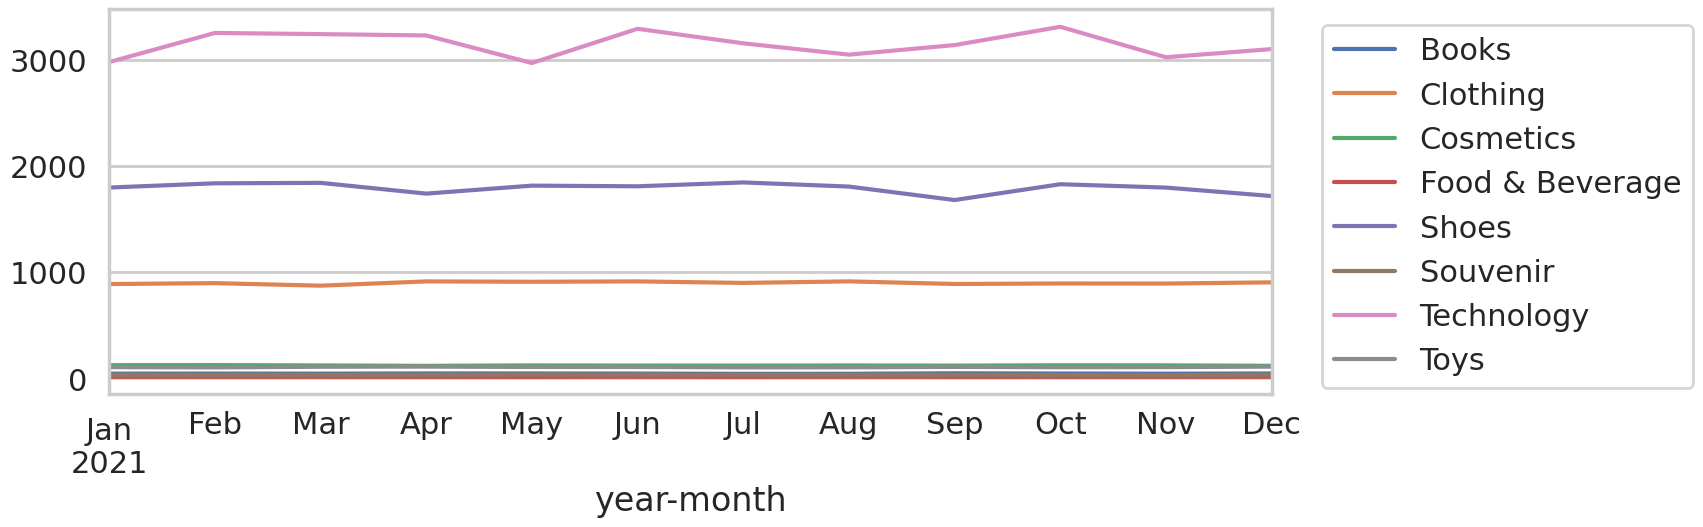

In [ ]:
show_diagram(df_price2021_m)

In [ ]:
df_price2022 =  pd.pivot_table(df_2022, values = 'price', index= 'year-month', columns='category', aggfunc='mean')
df_price2022

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2022-01,47.242899,911.799322,121.495952,15.199097,1758.959769,34.022308,3208.333333,105.401379
2022-02,46.261607,896.953530,119.433777,14.956146,1820.515667,36.749840,2998.333333,104.922899
2022-03,45.522143,894.315869,121.314534,15.793564,1846.676923,34.323251,3115.945946,111.632787
2022-04,43.166080,905.674520,123.782305,15.672150,1844.070726,34.693492,3330.645161,107.327312
2022-05,44.037047,913.837375,123.671348,15.787179,1818.336832,33.138852,3181.500000,103.028772
2022-06,47.948138,898.604050,120.258942,15.526023,1823.016375,35.838066,3166.071429,107.226230
2022-07,44.481507,909.480000,121.191182,15.873831,1818.449864,36.999415,2988.861386,104.966514
2022-08,45.136010,880.189096,123.224026,14.940276,1774.008987,36.734927,3184.054054,110.597172
2022-09,45.895588,917.768037,126.696274,15.727899,1888.578424,34.768923,2948.484848,110.240838


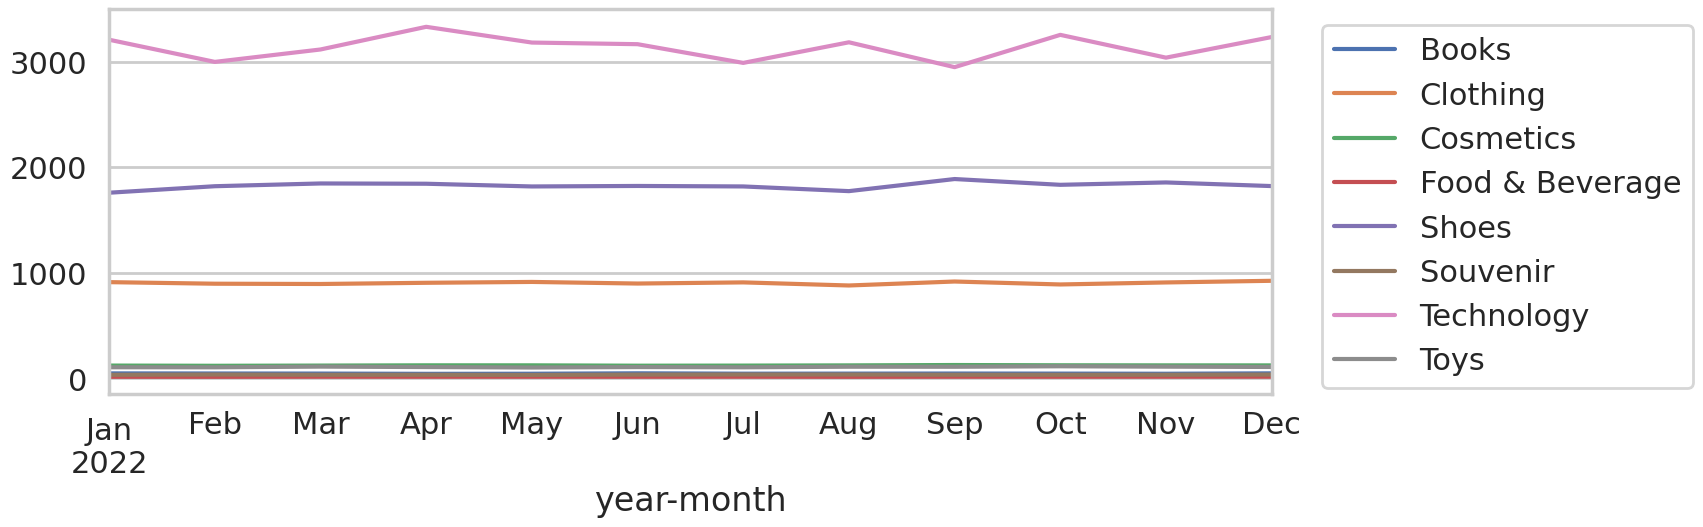

In [ ]:
show_diagram(df_price2022)

In [ ]:
df_price2023 =  pd.pivot_table(df_2023_corrected, values = 'price', index= 'year-month', columns='category', aggfunc='mean')
df_price2023

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2023-01,44.863548,885.609881,122.813197,15.663041,1734.078969,33.690677,3325.000000,106.590815
2023-02,43.838298,896.189426,123.947419,15.690000,1850.293687,33.391971,3321.428571,110.592000
2023-03,46.051987,898.400630,121.561687,15.730621,1781.045027,33.630949,3283.000000,102.464201


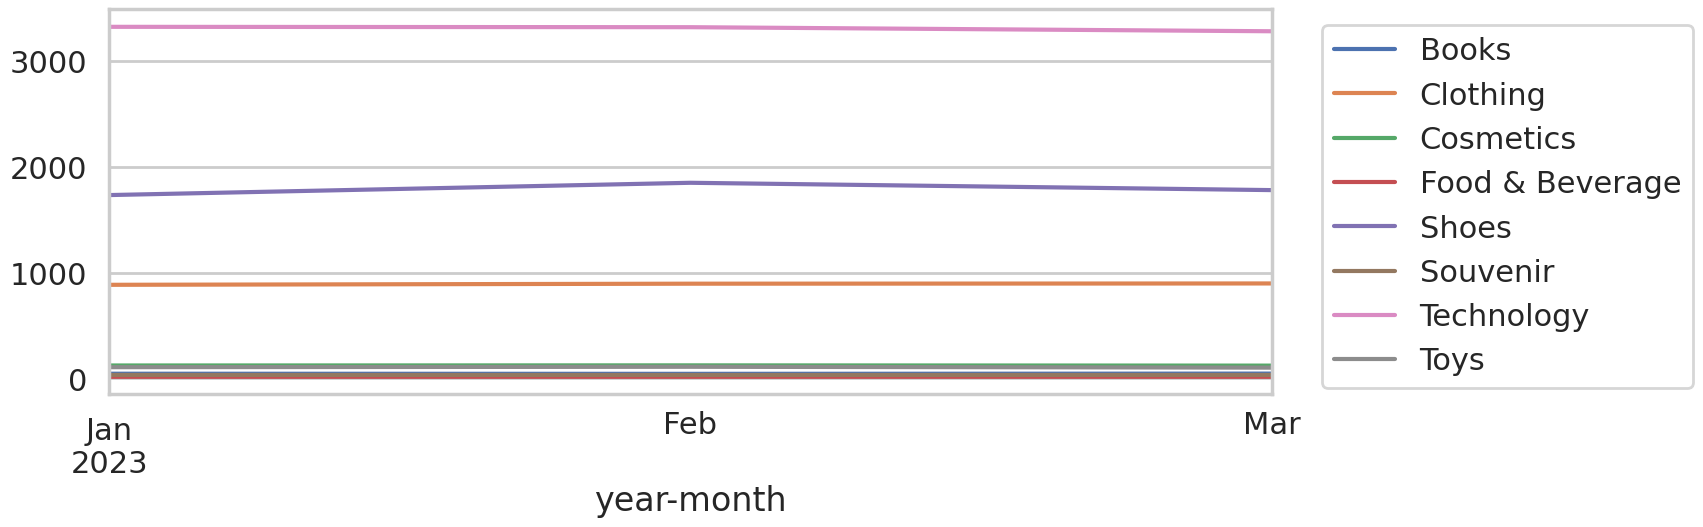

In [ ]:
show_diagram(df_price2023)

In [ ]:
#Динамика спроса по категориям в течение года. Объемы продаж

In [ ]:
df_quantity2021 =  pd.pivot_table(df_2021, values = 'quantity', index='category', columns='year-month', aggfunc='sum')
df_quantity2021

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
category,,,,,,,,,,,,
Books,572,483,572,563,571,542,562,563,515,609,511,542
Clothing,3908,3559,4119,4187,4053,3910,4308,3835,3848,4029,4041,4074
Cosmetics,1664,1531,1792,1617,1693,1811,1795,1691,1564,1789,1706,1713
Food & Beverage,1723,1500,1627,1683,1681,1751,1731,1814,1602,1678,1739,1773
Shoes,1207,1148,1252,1041,1343,1034,1187,1168,1002,1167,1045,1139
Souvenir,556,513,562,623,624,576,601,580,462,539,502,607
Technology,522,474,599,609,495,602,592,572,565,659,504,573
Toys,1109,1026,1185,1017,1194,1205,1204,1085,1198,1128,1081,1276


In [ ]:
df_quantity2021_m =  pd.pivot_table(df_2021, values = 'quantity', index= 'year-month', columns= 'category', aggfunc='sum')
df_quantity2021_m

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2021-01,572,3908,1664,1723,1207,556,522,1109
2021-02,483,3559,1531,1500,1148,513,474,1026
2021-03,572,4119,1792,1627,1252,562,599,1185
2021-04,563,4187,1617,1683,1041,623,609,1017
2021-05,571,4053,1693,1681,1343,624,495,1194
2021-06,542,3910,1811,1751,1034,576,602,1205
2021-07,562,4308,1795,1731,1187,601,592,1204
2021-08,563,3835,1691,1814,1168,580,572,1085
2021-09,515,3848,1564,1602,1002,462,565,1198


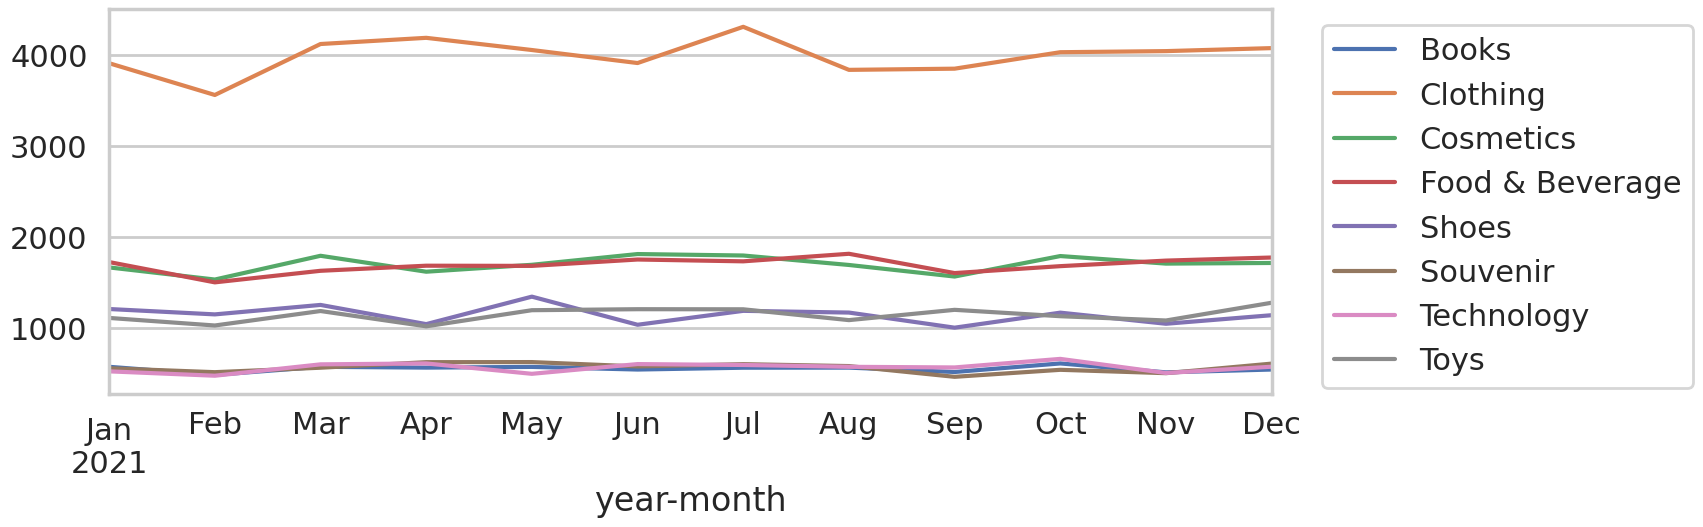

In [ ]:
show_diagram(df_quantity2021_m)

In [ ]:
df_quantity2022 =  pd.pivot_table(df_2022, values = 'quantity', index='year-month', columns='category', aggfunc='sum')
df_quantity2022

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2022-01,527,3944,1757,1610,1143,641,660,1194
2022-02,513,3548,1501,1447,1092,589,514,1010
2022-03,631,3925,1823,1830,1320,594,549,1140
2022-04,567,3833,1717,1756,1143,559,590,1114
2022-05,561,3898,1828,1787,1224,517,606,1147
2022-06,595,3845,1677,1799,1215,553,591,1095
2022-07,643,4134,1690,1727,1115,593,575,1151
2022-08,575,3863,1882,1654,1138,642,561,1222
2022-09,618,3927,1773,1660,1158,578,556,1175


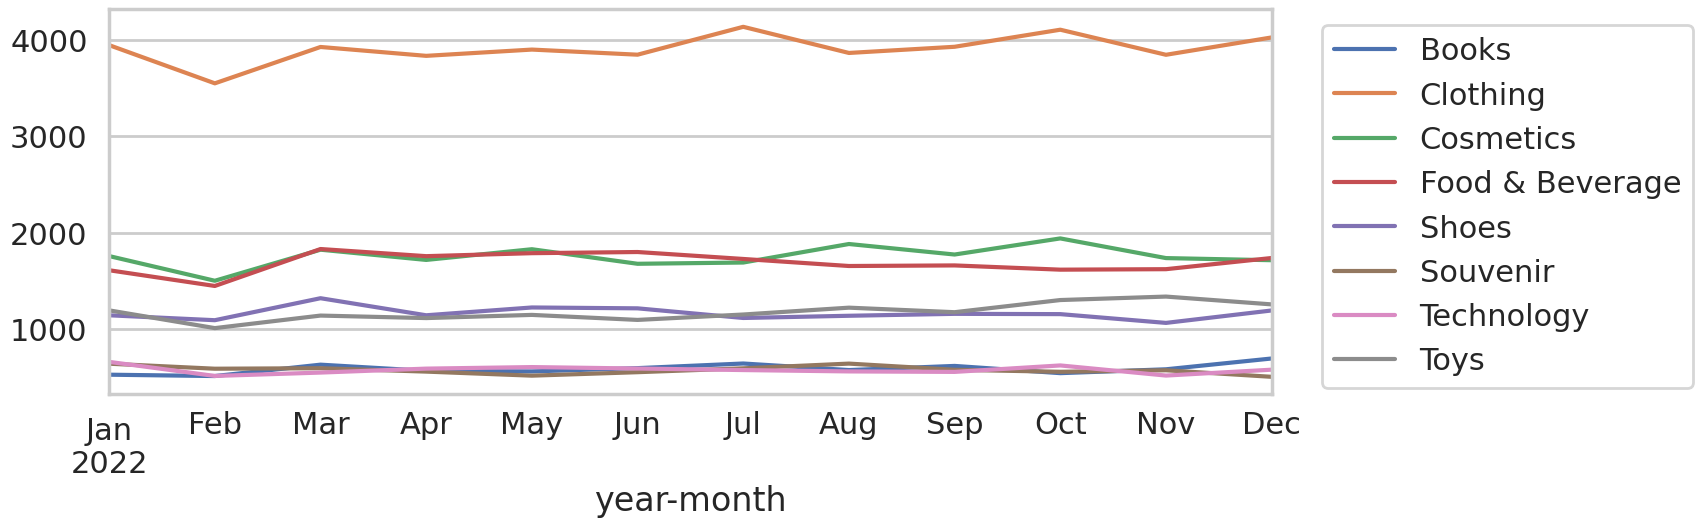

In [ ]:
show_diagram(df_quantity2022)

In [ ]:
df_quantity2023 =  pd.pivot_table(df_2023_corrected, values = 'quantity', index='year-month', columns='category', aggfunc='sum')
df_quantity2023

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
year-month,,,,,,,,
2023-01,459,2724,1474,1162,757,382,399,803
2023-02,408,2655,1134,1020,669,390,465,756
2023-03,459,3419,1453,1549,1098,453,469,912


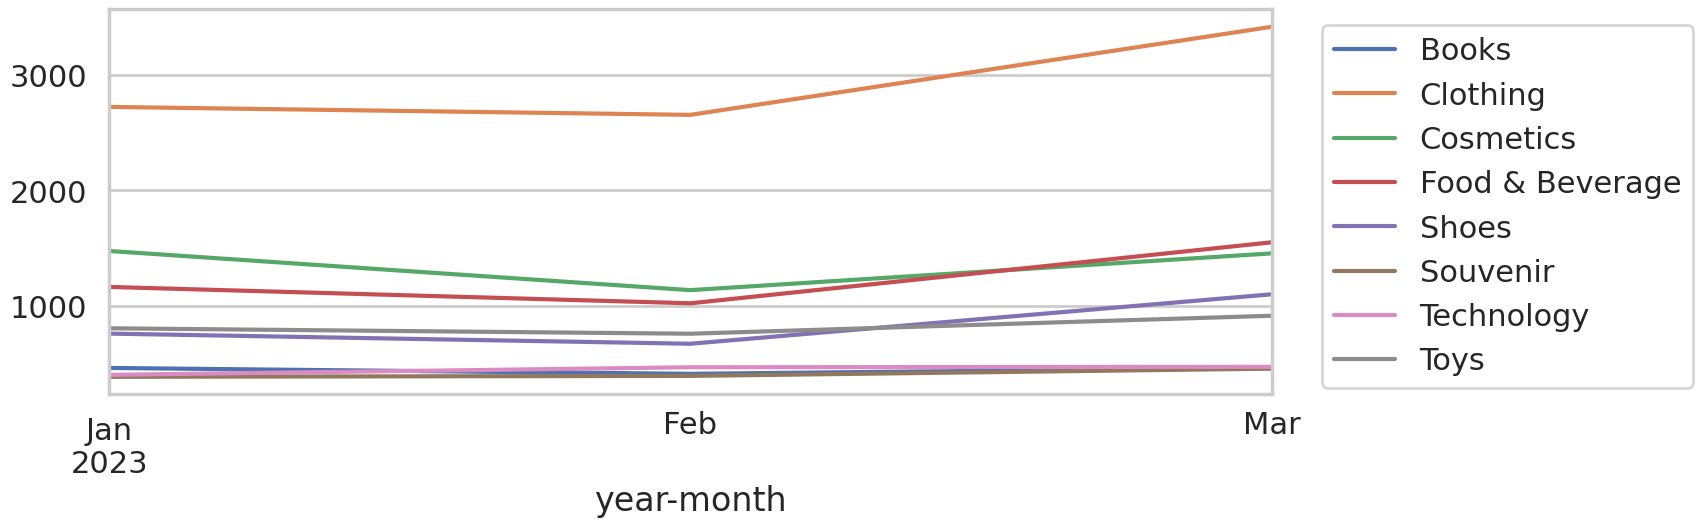

In [ ]:
show_diagram(df_quantity2023)

По динамике объемов продаж по месяцам наблюдается падение в феврале на все категории товаров и увеличение спроса в июле и октябре на одежду. Косметику в августе и октябре покупают больше. По остальным категориям товаров сезонность спроса незначительна. Было бы ещё интересно посмотреть на ассортимент товаров в целом.

In [ ]:
# Анализ продаж за 2021 год

In [ ]:
df_2021.groupby(['category']).agg({'customer_id':'count','sum_of_purchase':'sum','quantity':'sum'}).sort_values('sum_of_purchase', ascending= False)

,customer_id,sum_of_purchase,quantity
category,,,
Clothing,15973,52604924.24,47871
Shoes,4594,30125533.15,13733
Technology,2257,25951800.00,6766
Cosmetics,6779,3033723.92,20366
Toys,4575,1796444.16,13708
Food & Beverage,6747,390848.36,20302
Books,2187,369008.55,6605
Souvenir,2270,288288.21,6745


In [ ]:
df_2022.groupby('category').agg({'customer_id':'count','sum_of_purchase':'sum','quantity':'sum'}).sort_values('sum_of_purchase', ascending= False)

,customer_id,sum_of_purchase,quantity
category,,,
Clothing,15560,51753897.36,46889
Shoes,4591,30944765.20,13960
Technology,2316,26651100.00,6922
Cosmetics,6972,3150499.44,21038
Toys,4678,1861888.00,14142
Books,2347,391945.65,7051
Food & Beverage,6786,386852.64,20244
Souvenir,2301,295865.79,6901


In [ ]:
df_2023_corrected.groupby('category').agg({'customer_id':'count','sum_of_purchase':'sum','quantity':'sum'}).sort_values('sum_of_purchase', ascending= False)

,customer_id,sum_of_purchase,quantity
category,,,
Clothing,2954,9637969.44,8798
Shoes,849,5483153.12,2524
Technology,423,5259450.00,1333
Cosmetics,1346,608639.54,4061
Toys,834,322094.08,2471
Books,447,73598.70,1326
Food & Beverage,1243,71834.05,3731
Souvenir,428,51670.65,1225


In [ ]:
# Выручка за 3 года:
df_shops_revenue_all = pd.pivot_table(raw_set, values = 'sum_of_purchase', index='shopping_mall', columns='year', aggfunc='sum')
df_shops_revenue_all

year,2021,2022,2023
shopping_mall,,,
Cevahir AVM,5758828.55,5831795.35,1054514.30
Emaar Square Mall,5981425.65,5423912.51,1000762.13
Forum Istanbul,5545748.97,5800267.22,957905.05
Istinye Park,11153570.10,11469526.74,1995730.84
Kanyon,23168216.05,22922200.33,4463814.72
Mall of Istanbul,23269156.43,23410362.30,4192962.95
Metrocity,16665693.56,17244618.86,3392474.91
Metropol AVM,11795485.33,11375841.00,2208586.86
Viaport Outlet,5572378.72,5920500.33,1028460.67


<Axes: title={'center': 'Выручка в магазинах'}, xlabel='shopping_mall'>

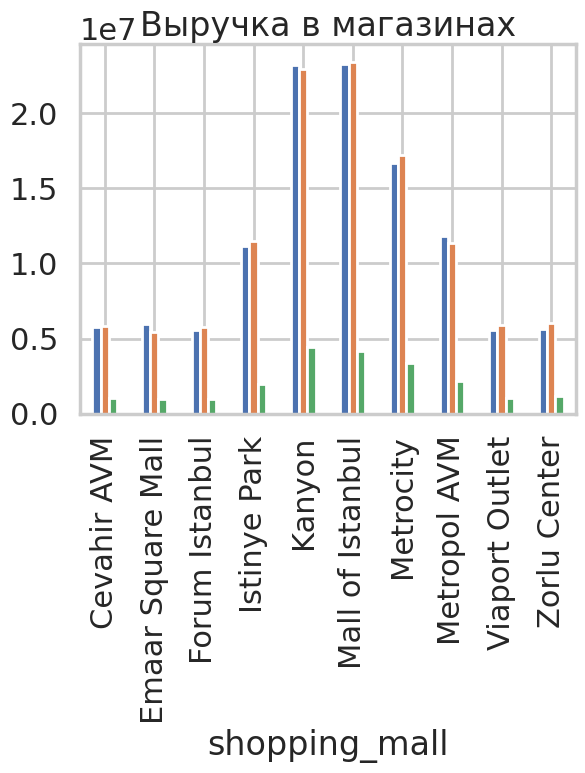

In [ ]:
df_shops_revenue_all.plot(kind = 'bar',title = 'Выручка в магазинах', legend = True)


In [ ]:
# Выручка по магазинам за год
#2021
df_shops_revenue2021 = pd.pivot_table(df_2021, values = 'sum_of_purchase', index='year-month', columns='shopping_mall', aggfunc='sum')
df_shops_revenue2021

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
year-month,,,,,,,,,,
2021-01,529950.57,501614.94,453420.07,1022127.39,1844676.14,1906087.11,1237764.91,870744.40,499445.91,445455.66
2021-02,356745.85,426629.71,443648.02,782859.35,1782027.30,2048622.82,1302884.08,959351.63,387130.20,324891.88
2021-03,523881.05,577159.33,440907.29,902188.63,2237510.49,2057609.32,1455626.50,932584.52,419324.72,512557.96
2021-04,518516.42,446799.03,532673.75,896828.20,1884853.82,2026622.99,1375015.29,878188.03,547090.74,623553.31
2021-05,517460.81,493572.93,598117.58,850150.41,1992949.04,2194681.33,1242564.86,997343.53,514934.34,365699.42
2021-06,369464.38,485775.74,560116.12,905409.65,1935758.86,1854419.53,1523886.92,1037760.42,388417.80,424363.15
2021-07,479632.41,596911.82,391374.63,1161919.49,2091886.65,1820348.60,1458768.84,972230.72,536331.75,633191.10
2021-08,425712.44,340073.73,410231.22,796462.97,1936663.67,1864899.29,1585122.90,1169771.27,531679.00,429938.18
2021-09,548381.44,515764.56,436705.53,872616.61,1689224.93,1939166.28,1253925.87,859222.28,399273.39,398921.44


In [ ]:

# 2022:
df_shops_revenue2022 = pd.pivot_table(df_2022, values = 'sum_of_purchase', index='shopping_mall', columns='year-month', aggfunc='sum')
df_shops_revenue2022

year-month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
shopping_mall,,,,,,,,,,,,
Cevahir AVM,499447.66,561748.29,443331.65,536826.40,551550.40,432633.38,392309.48,522834.50,587479.27,386909.81,472862.00,443862.51
Emaar Square Mall,540605.62,286487.93,482897.91,437575.82,488857.09,463940.91,430440.11,444664.83,428657.23,562408.14,300323.46,557053.46
Forum Istanbul,508561.99,472329.09,530379.13,493217.75,462770.36,446390.99,424829.65,590245.10,412531.68,556281.15,486293.95,416436.38
Istinye Park,992509.96,949826.63,978952.04,751327.05,1202850.88,898649.56,929634.71,1029155.37,901125.29,985678.76,822785.85,1027030.64
Kanyon,1836500.88,1533816.32,2125420.87,2000353.28,2053137.91,1949969.82,1870707.51,1757317.36,1879122.65,2122297.88,1954763.47,1838792.38
Mall of Istanbul,2140478.56,1837508.54,1955810.09,1823296.20,2037657.36,1893750.09,2001433.88,1755387.45,2070203.94,2042333.55,1933599.29,1918903.35
Metrocity,1579921.31,1194890.93,1368348.42,1681215.99,1288289.90,1598424.07,1400307.10,1408717.28,1444230.02,1481131.08,1334706.48,1464436.28
Metropol AVM,931278.53,771586.65,979208.04,928211.96,899272.29,909207.22,1065668.11,939742.82,967608.95,964033.97,966970.06,1053052.40
Viaport Outlet,375515.88,561982.05,475099.43,391186.04,344952.40,576216.34,615086.08,495112.86,467377.33,544323.39,408463.93,665184.60


In [ ]:
df_shops_revenue2023 = pd.pivot_table(df_2023_corrected, values = 'sum_of_purchase', index='shopping_mall', columns='year-month', aggfunc='sum')
df_shops_revenue2023

year-month,2023-01,2023-02,2023-03
shopping_mall,,,
Cevahir AVM,298946.98,348431.97,407135.35
Emaar Square Mall,355944.08,269572.33,375245.72
Forum Istanbul,225749.66,357109.89,375045.50
Istinye Park,548175.55,597559.82,849995.47
Kanyon,1356607.78,1393272.08,1713934.86
Mall of Istanbul,1244221.83,1305794.34,1642946.78
Metrocity,1084924.15,1022304.16,1285246.60
Metropol AVM,780360.42,572260.90,855965.54
Viaport Outlet,324823.29,243266.31,460371.07


In [ ]:
# Посещаемость за 3 года:
df_attendance_all = pd.pivot_table(raw_set, values = 'customer_id', index='shopping_mall', columns='year', aggfunc='count')
df_attendance_all

year,2021,2022,2023
shopping_mall,,,
Cevahir AVM,2365,2231,395
Emaar Square Mall,2222,2159,430
Forum Istanbul,2253,2281,413
Istinye Park,4419,4521,841
Kanyon,8946,9153,1724
Mall of Istanbul,9026,9202,1715
Metrocity,6856,6890,1265
Metropol AVM,4679,4613,869
Viaport Outlet,2286,2220,408


В целом тенденция положительная по всем магазинам кроме Metropol AVM и Viaport Outlet. Количество покупателей возрасло в 2022 году относительно 2021

In [ ]:
df_shops_categories.plot(kind = 'bar',title = 'Объем продаж по категориям товаров по магазинам', figsize=(20, 6))

In [ ]:
# Посещаемость магазинов за год
# 2021
df_attendance2021 = pd.pivot_table(df_2021, values = 'customer_id', index='shopping_mall', columns='year-month', aggfunc='count')
df_attendance2021

year-month,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
shopping_mall,,,,,,,,,,,,
Cevahir AVM,209,171,214,198,209,185,210,188,180,201,188,212
Emaar Square Mall,186,144,191,188,207,189,196,164,175,192,175,215
Forum Istanbul,190,167,198,197,232,192,172,192,175,197,178,163
Istinye Park,378,340,375,332,338,349,427,362,346,403,396,373
Kanyon,739,673,794,719,767,720,803,765,701,765,729,771
Mall of Istanbul,785,692,755,727,757,747,802,730,744,761,750,776
Metrocity,534,507,602,583,547,603,604,577,559,587,576,577
Metropol AVM,377,371,410,389,409,393,368,395,379,389,398,401
Viaport Outlet,196,166,193,228,207,181,212,189,178,173,169,194


In [ ]:
# 2022
df_attendance2022 = pd.pivot_table(df_2022, values = 'customer_id', index='shopping_mall', columns='year-month', aggfunc='count')
df_attendance2022

year-month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
shopping_mall,,,,,,,,,,,,
Cevahir AVM,195,180,197,199,178,169,185,192,198,181,190,167
Emaar Square Mall,185,152,190,173,169,184,185,184,176,208,155,198
Forum Istanbul,189,164,196,187,200,173,192,217,190,207,186,180
Istinye Park,385,380,374,351,426,368,382,390,348,388,340,389
Kanyon,787,657,820,748,773,760,756,757,739,817,781,758
Mall of Istanbul,764,707,790,747,796,735,808,778,750,758,812,757
Metrocity,587,489,571,598,593,640,582,580,549,599,543,559
Metropol AVM,381,349,414,365,379,365,404,405,410,373,353,415
Viaport Outlet,179,188,190,170,144,194,190,201,189,196,172,207


В целом, посещаемость выше в марте, июле, августе - возможно связано с туристическим сезоном или отпусками. Повышение посещаемости в ноябре-декабре скорее всего звязано с праздниками

In [ ]:
df_attendance2023 = pd.pivot_table(df_2023_corrected, values = 'customer_id', index='shopping_mall', columns='year-month', aggfunc='count')
df_attendance2023

year-month,2023-01,2023-02,2023-03
shopping_mall,,,
Cevahir AVM,133,112,150
Emaar Square Mall,147,108,175
Forum Istanbul,125,136,152
Istinye Park,255,262,324
Kanyon,579,491,654
Mall of Istanbul,564,481,670
Metrocity,391,381,493
Metropol AVM,279,260,330
Viaport Outlet,132,112,164


In [ ]:
df_shops_sales2022 = pd.pivot_table(df_2022, values = 'quantity', index=['shopping_mall','category'], columns='year-month', aggfunc='sum')
df_shops_sales2022

year-month                     2022-01  2022-02  2022-03  2022-04  2022-05  \
shopping_mall category                                                       
Cevahir AVM   Books                 36       25       30       10       26   
              Clothing             197      167      143      191      193   
              Cosmetics            117       65       78       86       99   
              Food & Beverage       73       97      116       95       79   
              Shoes                 46       51       47       80       72   
...                                ...      ...      ...      ...      ...   
Zorlu Center  Food & Beverage       86       95       62       91       90   
              Shoes                 50       56       73       74       89   
              Souvenir              30       21       18       19       24   
              Technology            40       24       26       37       41   
              Toys                  28       69       46       70       43   

year-month                     2022-06  2022-07  2022-08  2022-09  2022-10  \
shopping_mall category                                                       
Cevahir AVM   Books                 33       19       26       36       33   
              Clothing             163      178      197      230      176   
              Cosmetics             73       86       81       72      119   
              Food & Beverage       91      110       72       73       61   
              Shoes                 47       44       64       38       41   
...                                ...      ...      ...      ...      ...   
Zorlu Center  Food & Beverage       99       61       88       60       75   
              Shoes                 77       57       62       65       40   
              Souvenir              26       21       29       38       24   
              Technology            32       28       24       11       24   
              Toys                  54       95       64       59       62   

year-month                     2022-11  2022-12  
shopping_mall category                           
Cevahir AVM   Books                 22       33  
              Clothing             185      200  
              Cosmetics             61       56  
              Food & Beverage      104       77  
              Shoes                 49       50  
...                                ...      ...  
Zorlu Center  Food & Beverage      133       90  
              Shoes                 56       44  
              Souvenir               7       16  
              Technology            22       41  
              Toys                  56       40  

[80 rows x 12 columns]

In [ ]:
# объемы продаж по магазинам и по категориям
df_shops_categories = pd.pivot_table(raw_set, values = 'quantity', index='shopping_mall', columns='category', aggfunc='sum')
df_shops_categories

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,792,5180,2174,2293,1473,708,780,1549
Emaar Square Mall,730,5038,2272,2109,1452,726,795,1379
Forum Istanbul,756,5239,2342,2072,1459,775,673,1536
Istinye Park,1368,10165,4396,4478,3010,1566,1438,3044
Kanyon,2969,20513,9155,8695,6065,3025,3050,5985
Mall of Istanbul,3099,20813,9193,8878,6112,2921,3067,6031
Metrocity,2271,15729,6700,6764,4349,2197,2273,4611
Metropol AVM,1468,10552,4569,4586,3237,1586,1396,3136
Viaport Outlet,720,5101,2279,2186,1471,651,784,1524


<Axes: title={'center': 'Объем продаж по категориям товаров по магазинам'}, xlabel='shopping_mall'>

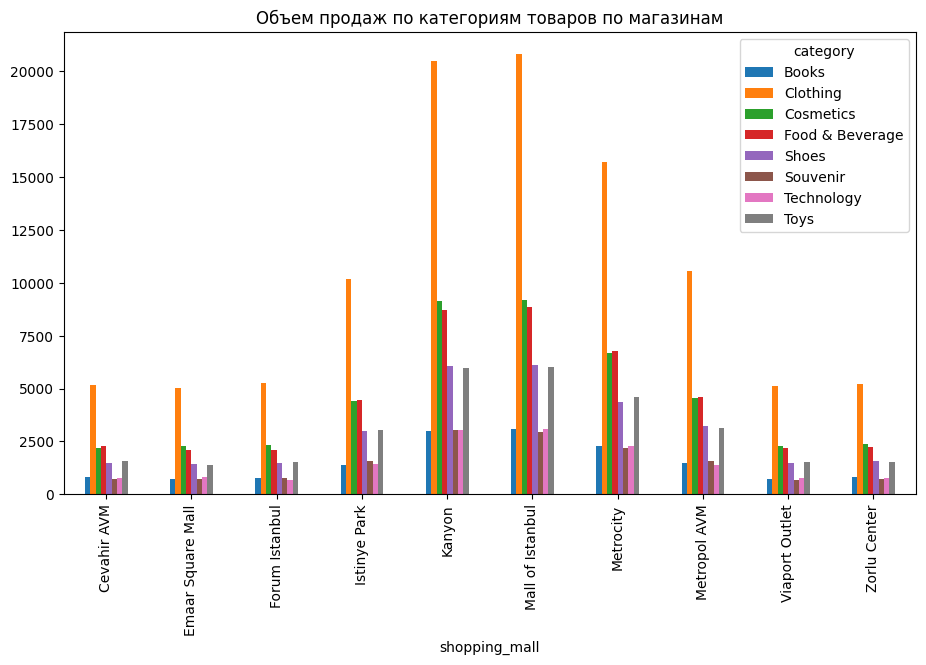

In [ ]:
df_shops_categories.plot(kind = 'bar',title = 'Объем продаж по категориям товаров по магазинам', figsize=(11, 6))

По объему продаж тенденция сохраняется и по каждому магазину в отдельности. Лидируют одежда, косметика, продукты.

In [ ]:
# выручка по магазиам и категориям

In [ ]:
df_shops_categories_revenue = pd.pivot_table(raw_set, values = 'sum_of_purchase', index='shopping_mall', columns='category', aggfunc='sum')
df_shops_categories_revenue

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,44541.00,5706321.28,321214.00,44010.45,3243918.85,29723.82,3051300.0,204108.80
Emaar Square Mall,41995.80,5590490.40,338941.76,40610.95,3089675.16,30943.74,3094350.0,179092.48
Forum Istanbul,42056.40,5792444.24,353172.76,39162.24,3327942.65,32879.19,2516850.0,199413.76
Istinye Park,76083.30,11253900.24,655357.88,85918.44,6641481.22,68925.48,5436900.0,400261.12
Kanyon,163029.15,22609527.60,1369550.78,166497.05,13383190.83,127399.53,11944800.0,790236.16
Mall of Istanbul,172240.35,22947417.68,1367517.78,171177.90,13467814.80,127540.29,11828250.0,790522.88
Metrocity,125911.65,17226692.56,991860.04,129902.74,9519296.37,94227.09,8608950.0,605946.88
Metropol AVM,83718.90,11568084.00,680770.38,88638.04,7149825.21,67869.78,5327700.0,413306.88
Viaport Outlet,39632.40,5604594.16,347439.70,41662.18,3194704.91,27319.17,3066000.0,199987.20


<Axes: title={'center': 'Выручка по категориям товаров по магазинам'}, xlabel='shopping_mall'>

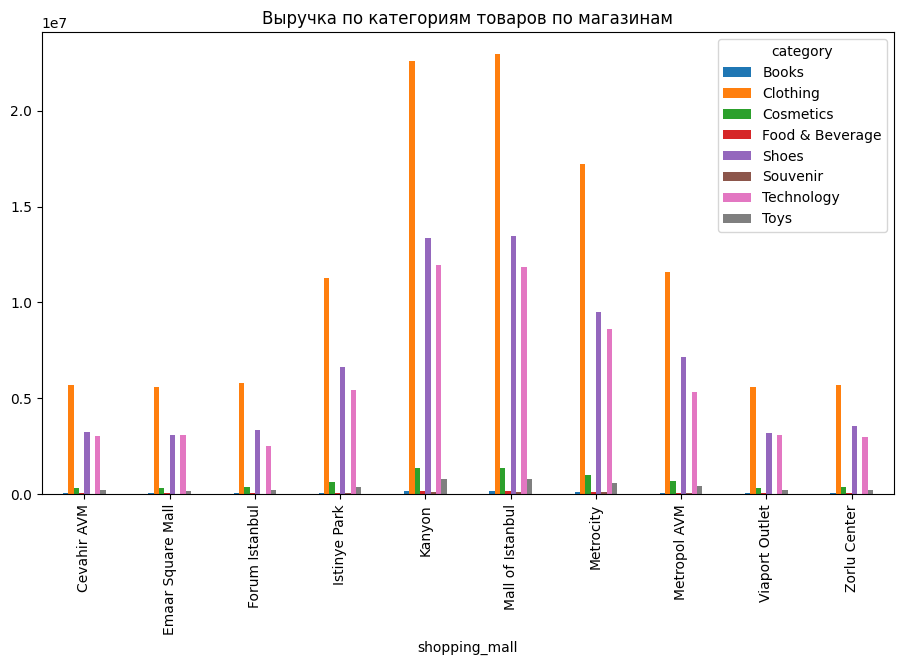

In [ ]:
df_shops_categories_revenue.plot(kind = 'bar',title = 'Выручка по категориям товаров по магазинам', figsize=(11, 6))

По каждому магазину в отдельности большую прибыль приносит одежда, обувь и техника

Выводы:
1. Выяснить по какой причине не корректно сохранялись данные
2. Варианты увеличения прибыли: повышать средний чек за счет повышения цен, либо за счет оъемов продаж.

3. Поскольку объемы продаж групп товаров косметика и игрушки довольно высокие, я бы предложила более подробно проанализировать спрос по ним. Например по косметике средний ценник за 3 года почти не менялся.(в ТЦ нет товаров другой ценовой категории или есть, но они не пользуются спросом)

4. По имеющимся в продаже позициям косметики я предлагаю провести сравнение цен с конкурентами, возможно стоит повышать цены. Так же, возможно, стоит пересмотреть ассортимент и закупать более дорогую косметику.  

5. В целом, средний чек за 3 года менялся незначительно, я бы рекомендовала провести исследование и сравнить цены с конкурентами, после чего принимать решение оставлять цены как есть или повышать. Либо действовать через расширение ассортимента, и увеличение позиций в чеке за счет допродаж или акций (товар дня, 1+1, увеличенный кэшбэк на определенную группу товаров).

6. Дата-сет не позволяет сравнить ассортимент более подробно не только по группам товаров, но и по-позиционно. Поэтому, предлагаю пересмотреть ассортимент на предмет актуальности и соответствия трендам.

7. Среди 10 магазинов по прибыли и объемам продаж выделяются 2. Для привлечения клиентов в другие ТЦ, я бы предложила сделать рекламные акции на покупку в определенном ТЦ.

8. Не удалось выявить сезонность по группам товаров. Что касается сезонности, можно сказать, что продажи снижаются в феврале(что может быть связано с поставками) и увеличиваются в июле и августе.(что скорее связано с туристическим сезоном).
